<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/DL/Transformer/0_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Seq 데이터에 대한 모델링!!!!
# ==> RNN ---> LSTM으로 간단하게 실습!!!!
# ==> 성능/튜닝!!!!!
# : 주가 데이터!!!

In [ ]:
# 주가 데이터 : pandas --> 여러 패키지!!!
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download( "NVDA", start="2020-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2020-01-02 00:00:00+00:00,5.973122,5.99775,5.99775,5.91800,5.96875,237536000
2020-01-03 00:00:00+00:00,5.877515,5.90175,5.94575,5.85250,5.87750,205384000
2020-01-06 00:00:00+00:00,5.902165,5.92650,5.93175,5.78175,5.80800,262636000
2020-01-07 00:00:00+00:00,5.973620,5.99825,6.04425,5.90975,5.95500,314856000
2020-01-08 00:00:00+00:00,5.984825,6.00950,6.05100,5.95375,5.99400,277108000


In [ ]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-10-22 00:00:00+00:00,143.589996,143.589996,144.419998,141.779999,142.910004,226311600
2024-10-23 00:00:00+00:00,139.559998,139.559998,142.429993,137.460007,142.029999,285930000
2024-10-24 00:00:00+00:00,140.410004,140.410004,141.350006,138.460007,140.820007,172354900
2024-10-25 00:00:00+00:00,141.539993,141.539993,144.130005,140.800003,140.929993,205122100
2024-10-28 00:00:00+00:00,140.520004,140.520004,143.139999,140.050003,143.000000,173031000


In [ ]:
import pandas as pd

<Axes: xlabel='Date'>

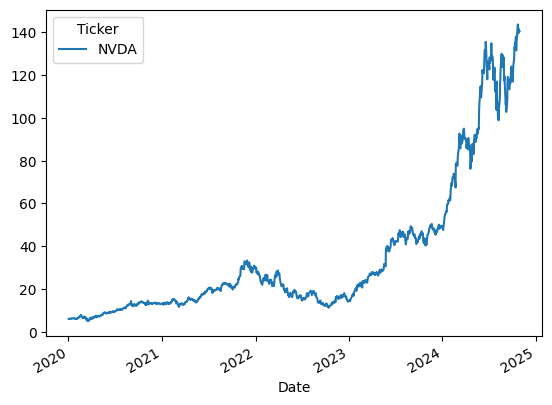

In [ ]:
data["Adj Close"].plot()

In [ ]:
# 가정 : Target을 명확하게 수정종가로 세팅!!!!
# ===> 날짜, 수정 종가!!!!!

In [ ]:
closing_prices = data["Adj Close"].values.reshape(-1, 1)
closing_prices.shape # 출력(n,1)
# ---> 모델을 돌리기 윌해서는 샘플 갯수 중심의 데이터 표현!!!!!

(1214, 1)

In [ ]:
# 입력 데이터를 정규화!!!!
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# --> 종가에 대해서 고가를 기준으로 0~1사이로 재종을 하겟습니다!!!!!!
scaler = MinMaxScaler( feature_range=(0,1))
closing_prices_scaled = scaler.fit_transform( closing_prices)
closing_prices_scaled

array([[0.0077826 ],
       [0.00709388],
       [0.00727144],
       ...,
       [0.97622772],
       [0.98436784],
       [0.97702013]])

In [ ]:
# 데이터를 재가공을 하기 위해서 처리를
import numpy as np

In [ ]:
def prepare_data( data, n_step): # 전 5일, 20일 ---> n_step
    x = []
    y = []
    for i in range( len(data)-n_step):
        x.append(data[i:(i+n_step),0]) # 전 5일 수정종가!!!!!!!D-1, D-2, D~5
        y.append(data[i+n_step,0]) # D-Day
        # 입력 seq(전 5일 종가) ---- 출력seq( 오늘의 종가 )
    return np.array(x), np.array(y)

In [ ]:
# --> 저는 1달의 : 20일 전의 종가들을 입력을 해서,,,,그 다음날 종가 예측!!!
n_step = 20
# ---> **** 수집한 데이터는 날짜별로 수집!!!
#           모델을 학습을 위한 in.out의 구조는
#           본인이 생각하는 대로 처리를 해야함!!!1
X, y = prepare_data( closing_prices_scaled, n_step)

In [ ]:
X.shape

(1194, 20)

In [ ]:
y.shape

(1194,)

In [ ]:
# DL에 돌리기 위해서,,,,Batch_size에 대한 부분을 고려하면서 짜야함!!!!!
# (1194, 20) --> ( 1994, 20, 1)
X = np.reshape( X, (X.shape[0], X.shape[1],1) )
X.shape

(1194, 20, 1)

In [ ]:
# Train/test
x_train = X[:1000,:]
y_train = y[:1000]

In [ ]:
x_test = X[1000:,:]
y_test = y[1000:]

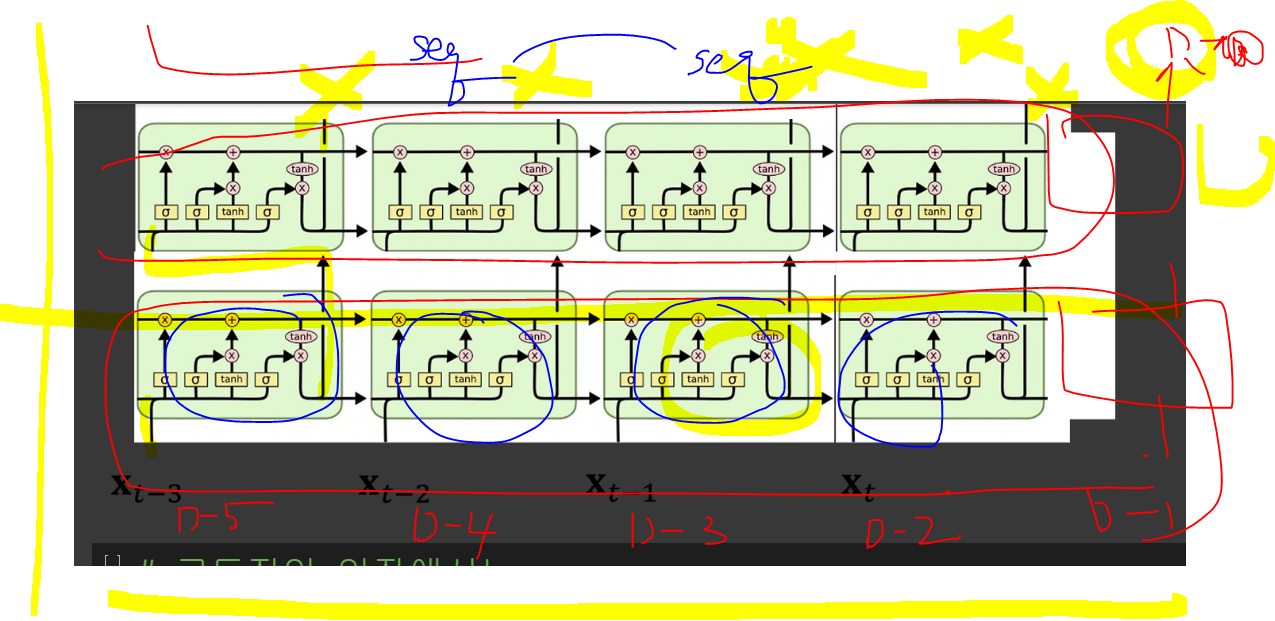

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM

In [ ]:
def create_lstm_model( input_shape):
    model = Sequential()
    model.add( LSTM( input_shape=input_shape, units=50, return_sequences=True))
    model.add( LSTM(units=50)) # --> return_sequences=False : 맨 마지막만 활성!!!
    model.add( Dense(units=1)) # AF skip!!!!!
    #
    model.compile( optimizer="Adam", loss="mean_squared_error")
    # --> mse, msle etc.....
    return model

In [ ]:
x_train.shape[1]

20

In [ ]:
model_1 = create_lstm_model( (x_train.shape[1], 1) )
model_1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential, built=True>

In [ ]:
from tensorflow.keras.utils import plot_model

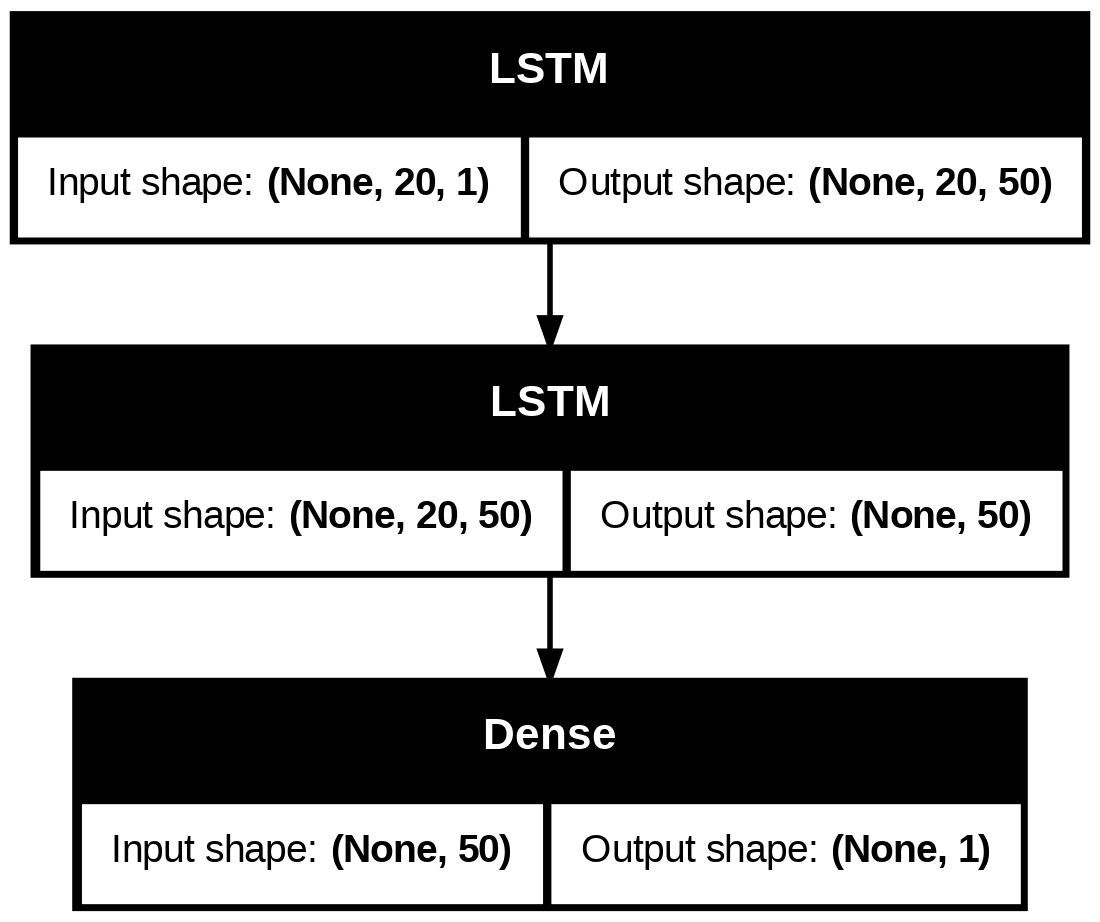

In [ ]:
plot_model(model_1, show_shapes=True)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0063
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3910e-04
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.4808e-04
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.7185e-04
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.5261e-04
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.3901e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.3282e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1374e-04
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.5665e-04
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1524e-04


In [ ]:
# 학습한 결과를 바탕으로 test에 적용 ---> 실제와 얼마나 잘 예측!!!!!!
train_pred = model_1.predict(x_train)
train_pred = scaler.inverse_transform(train_pred )
train_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[ 6.5456877],
       [ 6.5245643],
       [ 6.4999275],
       [ 6.484681 ],
       [ 6.4824424],
       [ 6.4943295],
       [ 6.5114474],
       [ 6.5475655],
       [ 6.602261 ],
       [ 6.6724596],
       [ 6.746473 ],
       [ 6.846604 ],
       [ 6.9685855],
       [ 7.1246724],
       [ 7.2862935],
       [ 7.420351 ],
       [ 7.4962826],
       [ 7.5104756],
       [ 7.4909782],
       [ 7.4278994],
       [ 7.364997 ],
       [ 7.315473 ],
       [ 7.2638793],
       [ 7.2416215],
       [ 7.224561 ],
       [ 7.2012777],
       [ 7.1442776],
       [ 7.0910597],
       [ 7.0223002],
       [ 6.902871 ],
       [ 6.791136 ],
       [ 6.6283956],
       [ 6.470244 ],
       [ 6.3051267],
       [ 6.1587067],
       [ 6.0227556],
       [ 5.9112306],
       [ 5.8763566],
       [ 5.8920665],
       [ 5.9565396],
       [ 6.04536  ],
       [ 6.1632133],
       [ 6.2895417],
       [ 6.385414 ],
       [ 6.470542 ],
       [ 6.5264325],
       [ 6.5936327],
       [ 6.65

In [ ]:
import matplotlib.pyplot as plt

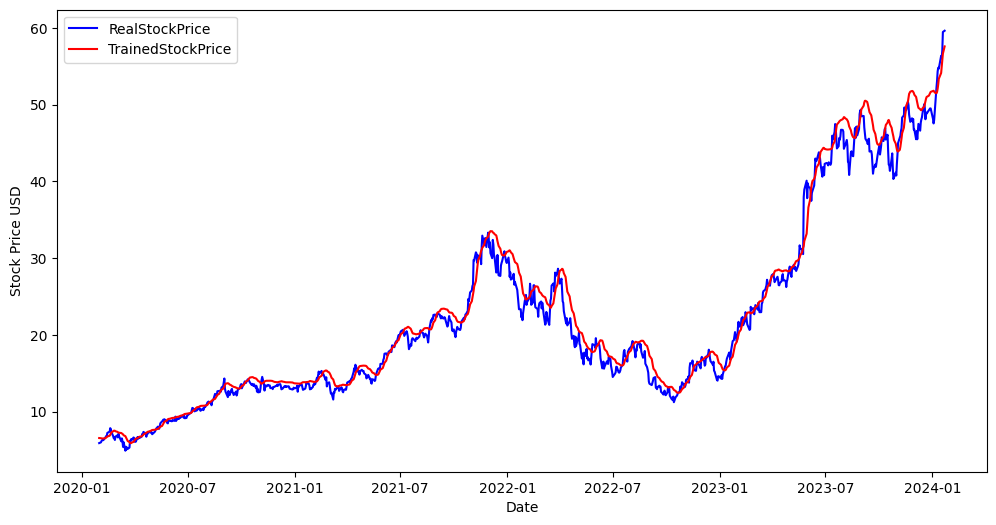

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( data.index[n_step:1000+n_step], closing_prices[n_step:1000+n_step],
         label="RealStockPrice", color="blue")
plt.plot( data.index[n_step:1000+n_step], train_pred,
         label="TrainedStockPrice", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price USD")
plt.legend()
plt.show()

In [ ]:
# ---> 학습에 전혀 사용하지 test
test_pred = model_1.predict(x_test)
test_pred = scaler.inverse_transform(test_pred)
test_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[ 58.55782 ],
       [ 59.493313],
       [ 60.44943 ],
       [ 61.375687],
       [ 62.18188 ],
       [ 62.955727],
       [ 63.676167],
       [ 64.22276 ],
       [ 64.72542 ],
       [ 65.38273 ],
       [ 66.31914 ],
       [ 67.312904],
       [ 68.41024 ],
       [ 69.472664],
       [ 70.61607 ],
       [ 71.739365],
       [ 72.77686 ],
       [ 73.80673 ],
       [ 74.67907 ],
       [ 75.39793 ],
       [ 75.73827 ],
       [ 75.67322 ],
       [ 76.12616 ],
       [ 76.88185 ],
       [ 77.81368 ],
       [ 78.7862  ],
       [ 79.64728 ],
       [ 80.47409 ],
       [ 81.45288 ],
       [ 82.679405],
       [ 84.041306],
       [ 85.581856],
       [ 87.427956],
       [ 88.971   ],
       [ 90.11785 ],
       [ 91.35563 ],
       [ 92.474205],
       [ 93.24526 ],
       [ 93.72411 ],
       [ 94.02315 ],
       [ 94.2307  ],
       [ 94.43112 ],
       [ 94.75144 ],
       [ 95.29261 ],
       [ 95.98699 ],
       [ 96.55922 ],
       [ 96.852615],
       [ 96.9

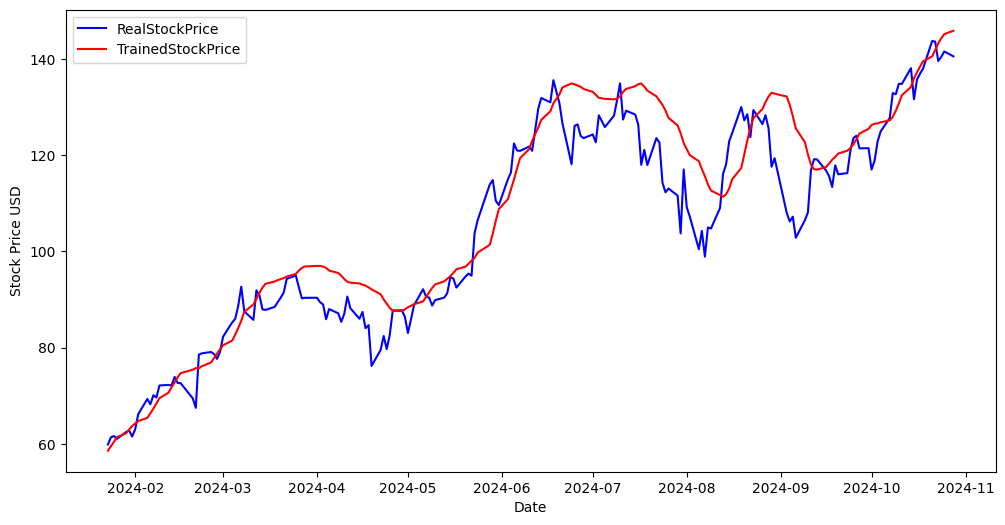

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( data.index[1000+n_step:], closing_prices[1000+n_step:],
         label="RealStockPrice", color="blue")
plt.plot( data.index[1000+n_step:], test_pred,
         label="TrainedStockPrice", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price USD")
plt.legend()
plt.show()

In [ ]:
# 정리!!!
# ---> 수집하는 데이터의 모양과!!!
# ---> Seq 모델을 돌리기 위한 데이터의 모양이 다름!!!
#      수집한 데이터를 바탕으로 입력 Seq / 출력 Seq 맞게 & 모델의 목적!!! 세팅!!
#      예) 5일 전의 데이터를 바탕으로 다음 날 종가예측 ( 5---1)
#          5일 전의 데이터를 바탕으로 다음 3일 종가예측( 5---3)
# *** 주의깊게 데이터 형성을 Seq의 관점으로 바라봐야 함!!!!

# * 시계열 데이터 예측!!!!!!!!!!